# **1. Perkenalan Dataset**


**Sumber Dataset**: [World Air Quality Index by City and Coordinates](https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates)

Dataset ini merupakan hasil penggabungan dua sumber data: satu berisi informasi lokasi kota (termasuk koordinat geografis) dan satu lagi memuat data tingkat polusi udara dari berbagai negara di dunia. Tujuannya adalah untuk memberikan wawasan tentang kualitas udara di berbagai wilayah, sehingga dapat membantu peneliti dan pembuat kebijakan dalam mengambil keputusan yang tepat terkait isu polusi udara. Dataset ini memungkinkan analisis dan perbandingan indeks kualitas udara (AQI) antar kota secara global, dengan fokus pada polutan utama seperti PM2.5, ozon, dan karbon monoksida yang memiliki dampak terhadap kesehatan manusia dan lingkungan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Pengolahan dan visualisasi data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import files
import json
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

In [2]:
files.upload()

# Pastikan kaggle.json sudah diupload ke Colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset dari Kagglee
!kaggle datasets download -d adityaramachandran27/world-air-quality-index-by-city-and-coordinates

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates
License(s): CC-BY-NC-SA-4.0
  0% 0.00/372k [00:00<?, ?B/s]
100% 372k/372k [00:00<00:00, 928MB/s]


In [3]:
# Ekstrak file zip jika diperlukan
!unzip world-air-quality-index-by-city-and-coordinates.zip

Archive:  world-air-quality-index-by-city-and-coordinates.zip
  inflating: AQI and Lat Long of Countries.csv  


In [4]:
# Load data
df = pd.read_csv('AQI and Lat Long of Countries.csv')

# Tampilkan 5 baris pertama
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## Informasi umum
Tujuan tahap ini adalah untuk melihat struktur dan tipe data awal.

In [5]:
# Informasi umum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB
None


## Statistik Deskriptif
Tujuan tahap ini adalah mengetahui ringkasan statistik seperti rata-rata dan standar deviasi.

In [6]:
# Statistik deskriptif
print(df.describe(include='all'))

                         Country        City     AQI Value AQI Category  \
count                      16393       16695  16695.000000        16695   
unique                       174       14229           NaN            6   
top     United States of America  Santa Cruz           NaN         Good   
freq                        3954          17           NaN         7708   
mean                         NaN         NaN     62.998682          NaN   
std                          NaN         NaN     43.091971          NaN   
min                          NaN         NaN      7.000000          NaN   
25%                          NaN         NaN     38.500000          NaN   
50%                          NaN         NaN     52.000000          NaN   
75%                          NaN         NaN     69.000000          NaN   
max                          NaN         NaN    500.000000          NaN   

        CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category  \
count   16695.000000   

Dari kedua output sebelumnya, kita bisa melihat bahwa dataset terdiri dari **16.695 baris dan 14 kolom** yang berisi informasi tentang kualitas udara di berbagai kota dan negara. Beberapa kolom menunjukkan nilai indeks kualitas udara (AQI) untuk berbagai polutan seperti CO, Ozon, NO2, dan PM2.5, serta kategori kualitas udaranya (misalnya "Good"). Kita juga melihat bahwa data **"Country" memiliki beberapa nilai kosong** (kurang dari total baris). Dari statistik deskriptif, terlihat bahwa sebagian besar nilai AQI berada di kisaran yang cukup rendah, dengan nilai maksimum mencapai 500, yang menunjukkan kualitas udara sangat buruk. Kota paling sering muncul adalah **Santa Cruz**, dan sebagian besar lokasi memiliki kategori udara "Good", terutama untuk CO dan PM2.5. Terakhir, kolom **lat** dan **lng** menunjukkan lokasi geografis masing-masing entri.

## Distribusi Nilai Kolom Numerik
Tujuan visualisasi ini adalah untuk melihat sebaran nilai-nilai fitur numerik.

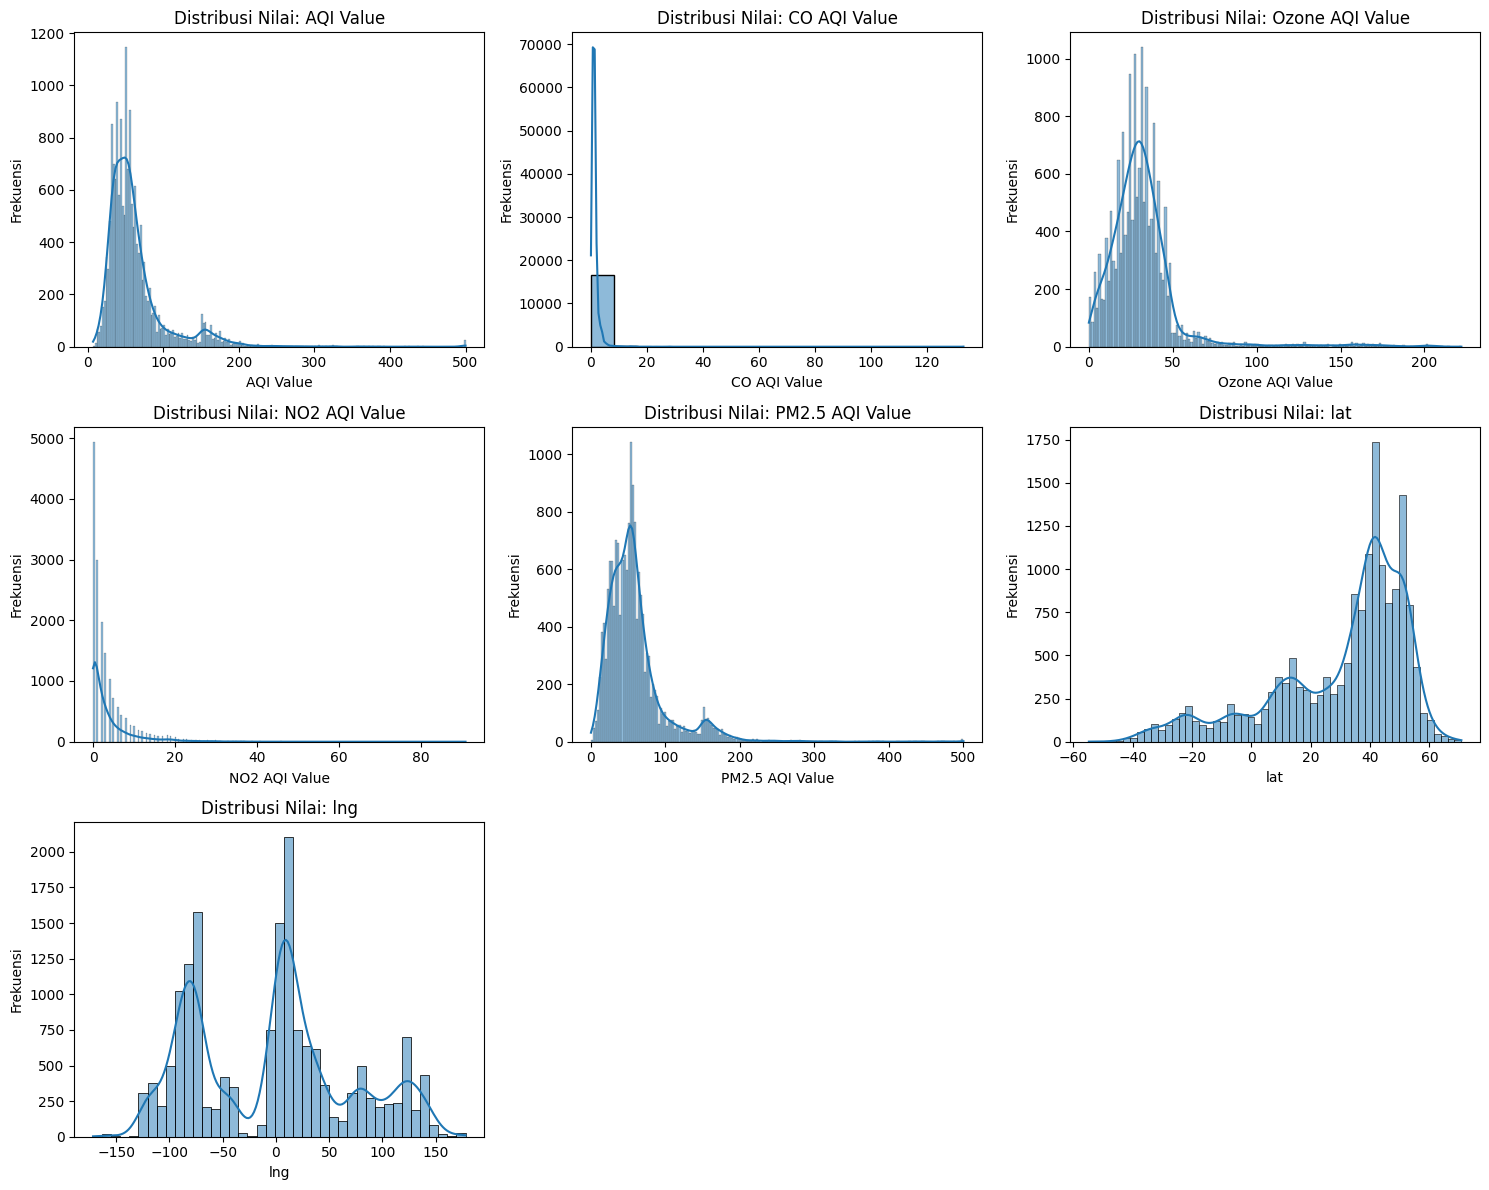

In [7]:
# Memilih kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns

# Menentukan jumlah baris dan kolom untuk subplot
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Membuat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Meratakan array axes untuk memudahkan iterasi

# Menggambar histogram untuk setiap kolom numerik
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribusi Nilai: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak terpakai jika jumlah kolom numerik tidak habis dibagi n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Grafik-grafik distribusi di atas menunjukkan sebaran nilai dari kolom numerik.

Sebagian besar lokasi memiliki kualitas udara yang tergolong baik hingga sedang, yang terlihat dari sebaran **nilai AQI (Air Quality Index)** yang terkonsentrasi di angka rendah, khususnya di bawah 100. Kategori AQI juga menunjukkan mayoritas berada pada label "Good", "Moderate", dan "Unhealthy for Sensitive Groups", sementara kategori "Hazardous" sangat jarang ditemukan.

Untuk polutan seperti **CO, Ozone, NO2, dan PM2.5**, pola distribusinya juga mirip, di mana kebanyakan nilainya rendah dan hanya sebagian kecil yang tinggi. Ini menandakan bahwa pencemaran udara ekstrem jarang terjadi, tapi tetap ada di beberapa wilayah.

Distribusi **latitude (lat)** dan **longitude (lng)** menunjukkan data berasal dari berbagai belahan dunia, dengan konsentrasi lokasi terbesar berada di belahan bumi utara dan wilayah barat—mungkin mencerminkan kota-kota besar atau negara dengan banyak pengamatan kualitas udara.

## Distribusi Kategori AQI
Tujuan visualisasi ini adalah untuk mengetahui jumlah masing-masing kategori kualitas udara.

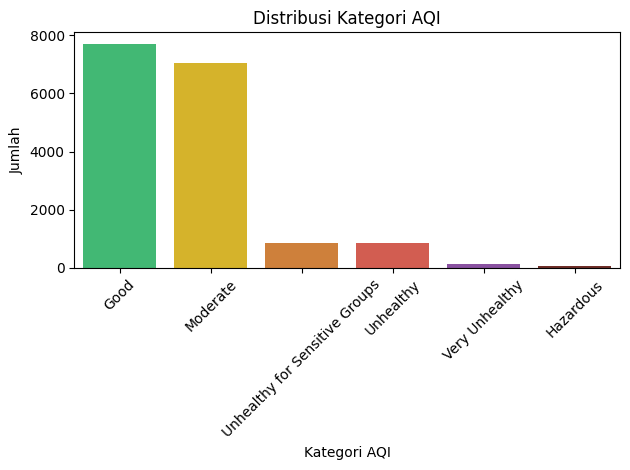

In [8]:
# Tentukan urutan kategori AQI dari yang paling baik ke paling buruk
aqi_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Tentukan warna sesuai tingkat keparahan (semakin merah = semakin buruk)
aqi_colors = {
    'Good': '#2ECC71',                             # Hijau
    'Moderate': '#F1C40F',                         # Kuning
    'Unhealthy for Sensitive Groups': '#E67E22',   # Oranye
    'Unhealthy': '#E74C3C',                        # Merah
    'Very Unhealthy': '#8E44AD',                   # Ungu
    'Hazardous': '#7B241C'                         # Merah gelap
}

# Buat plot dengan warna sesuai kategori
sns.countplot(data=df, x='AQI Category', order=aqi_order,
              palette=[aqi_colors[cat] for cat in aqi_order])

plt.title("Distribusi Kategori AQI")
plt.xticks(rotation=45)
plt.ylabel("Jumlah")
plt.xlabel("Kategori AQI")
plt.tight_layout()
plt.show()


Grafik tersebut menunjukkan pengukuran udara berdasarkan kategori kualitas udara (AQI). Terlihat bahwa sebagian besar udara berada dalam kategori **"Good" (Baik)** dan **"Moderate" (Sedang)**, yang berarti kualitas udaranya aman atau hanya berdampak kecil bagi kesehatan masyarakat. Sementara itu, jumlah data untuk kategori **"Unhealthy" (Tidak Sehat)** hingga **"Hazardous" (Berbahaya)** sangat sedikit. Hal ini menunjukkan bahwa kualitas udara dalam dataset ini masih tergolong baik, namun tetap ada sejumlah kecil lokasi dengan kondisi udara yang kurang sehat hingga sangat berbahaya yang perlu mendapat perhatian lebih.

## Persebaran Kategori AQI per Kota
Tujuan visualisasi ini adalah untuk melihat bagaimana kategori AQI tersebar di berbagai kota di belahan dunia.

In [9]:
# Visualisasi persebaran kategori AQI per kota
fig = px.scatter_geo(df,
                     lat='lat',
                     lon='lng',
                     color='AQI Category',
                     hover_name='City',
                     title='Peta Persebaran Kategori AQI per Kota',
                     color_discrete_sequence=px.colors.qualitative.Safe)
fig.update_geos(showcountries=True, showcoastlines=True)
fig.show()

Visualisasi di atas menampilkan peta dunia dengan kategori AQI dari masing-masing kota. Anda dapat memperbesar peta dan memilih kota mana yang ingin Anda lihat.

## Korelasi Antar Fitur Numerik
Tujuan visualisasi ini untuk mengetahui hubungan antar fitur numerik dalam data.

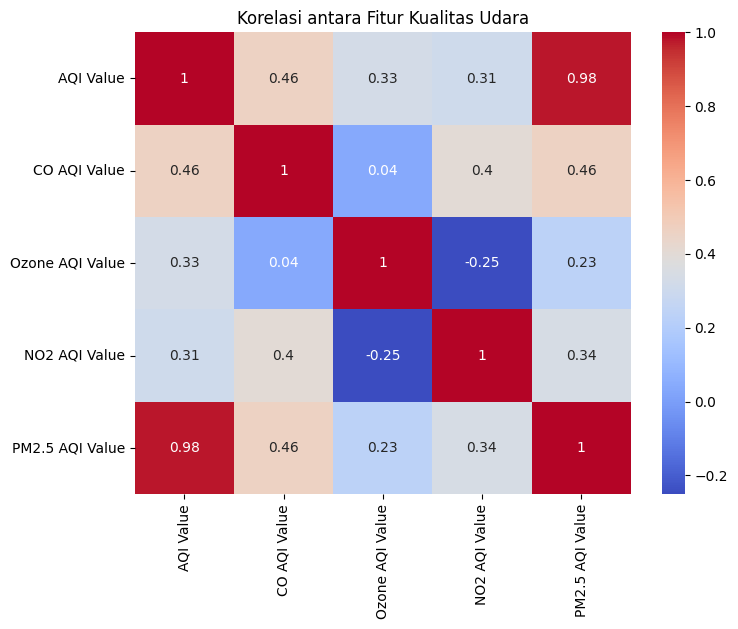

In [10]:
# Korelasi antar fitur numerik
numeric_cols = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # konversi ke numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antara Fitur Kualitas Udara")
plt.show()

Grafik di atas adalah **heatmap korelasi** yang menunjukkan hubungan antara berbagai jenis polusi udara dan nilai AQI (Air Quality Index). Nilai korelasi berkisar dari -1 (berlawanan arah) hingga 1 (searah sempurna). Semakin mendekati 1, berarti dua variabel tersebut saling meningkat bersama.

Dari grafik ini, kita bisa lihat bahwa **PM2.5** memiliki hubungan yang sangat kuat (0.98) dengan nilai AQI, artinya partikel halus PM2.5 adalah penyumbang utama dalam penilaian kualitas udara. **CO (karbon monoksida)** juga memiliki korelasi sedang (0.46) terhadap AQI, sedangkan **NO2** dan **ozone** menunjukkan hubungan yang lebih lemah, bahkan ozone menunjukkan korelasi negatif dengan NO2 (-0.25), yang bisa jadi karena keduanya berasal dari sumber yang berbeda dan punya perilaku atmosfer yang kompleks.

# **5. Data Preprocessing**

## Menangani Data Kosong
Tujuan proses ini adalah untuk mengetahui dan menghapus nilai yang hilang agar data bersih.

In [11]:
# Cek missing values
print(df.isnull().sum())

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64


In [12]:
# Hapus baris dengan nilai kosong
df.dropna(inplace=True)

## Encoding Data Kategorikal
Tujuan proses ini adalah untuk mengubah data kategorikal menjadi format numerik.

In [13]:
# Fitur yang akan digunakan
features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
target = 'AQI Category'

In [14]:
# Encoding label (kategori target)
le = LabelEncoder()
df[target] = le.fit_transform(df[target])

## Normalisasi Fitur
Tujuan proses ini adalah untuk menyamakan skala nilai antar fitur agar model tidak bias.

In [15]:
# Pisahkan fitur dan label
X = df[features]
y = df[target]

In [16]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data
Tujuan proses ini adalah untuk membagi data menjadi set pelatihan dan pengujian.

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Tampilkan hasil encoding label
print("Label AQI Category:", dict(zip(le.classes_, le.transform(le.classes_))))

Label AQI Category: {'Good': np.int64(0), 'Hazardous': np.int64(1), 'Moderate': np.int64(2), 'Unhealthy': np.int64(3), 'Unhealthy for Sensitive Groups': np.int64(4), 'Very Unhealthy': np.int64(5)}
